<a href="https://colab.research.google.com/github/nitish-pandey/Image-ClassiFier-using-CNN--Cat-vs-Dog-/blob/main/GTSRB_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import random
import os 

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import backend as k

from keras.models import Sequential
from keras.layers import Dense ,Conv2D,MaxPool2D, Dropout,Activation,BatchNormalization,Flatten
from keras.callbacks import EarlyStopping
from keras.regularizers import l2

from keras.preprocessing.image import ImageDataGenerator


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

## Data Download and preprocessing 

Here , the data is downloaded directly from the url in zip format

In [4]:
#Images for training
!curl -LOC - https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip
#Images for validation    
!curl -LOC - https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_Images.zip
#Labels for validation
!curl -LOC - https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_GT.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  263M  100  263M    0     0  19.4M      0  0:00:13  0:00:13 --:--:-- 23.6M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 84.8M  100 84.8M    0     0  15.3M      0  0:00:05  0:00:05 --:--:-- 19.6M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 99620  100 99620    0     0  90728      0  0:00:01  0:00:01 --:--:-- 90728


Unzipping the data

In [5]:
!unzip '/content/GTSRB_Final_Test_GT.zip'
!unzip '/content/GTSRB_Final_Test_Images.zip'
!unzip '/content/GTSRB_Final_Training_Images.zip'

Streaming output truncated to the last 5000 lines.
  inflating: GTSRB/Final_Training/Images/00038/00005_00007.ppm  
  inflating: GTSRB/Final_Training/Images/00038/00005_00008.ppm  
  inflating: GTSRB/Final_Training/Images/00038/00005_00009.ppm  
  inflating: GTSRB/Final_Training/Images/00038/00005_00010.ppm  
  inflating: GTSRB/Final_Training/Images/00038/00005_00011.ppm  
  inflating: GTSRB/Final_Training/Images/00038/00005_00012.ppm  
  inflating: GTSRB/Final_Training/Images/00038/00005_00013.ppm  
  inflating: GTSRB/Final_Training/Images/00038/00005_00014.ppm  
  inflating: GTSRB/Final_Training/Images/00038/00005_00015.ppm  
  inflating: GTSRB/Final_Training/Images/00038/00005_00016.ppm  
  inflating: GTSRB/Final_Training/Images/00038/00005_00017.ppm  
  inflating: GTSRB/Final_Training/Images/00038/00005_00018.ppm  
  inflating: GTSRB/Final_Training/Images/00038/00005_00019.ppm  
  inflating: GTSRB/Final_Training/Images/00038/00005_00020.ppm  
  inflating: GTSRB/Final_Training/Image

In [6]:
training_directory='/content/GTSRB/Final_Training/Images'
test_directory='/content/GTSRB/Final_Test/Images'

In [7]:
train_generator=ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.1,
    shear_range=0.1,
    validation_split=0.3
)
test_generator=ImageDataGenerator(rescale=1./255)

In [8]:
training_data=train_generator.flow_from_directory(
    training_directory,
    target_size=(64,64),
    color_mode='rgb',
    class_mode='categorical',
    subset='training'
)

validation_data=train_generator.flow_from_directory(
    training_directory,
    target_size=(64,64),
    color_mode='rgb',
    class_mode='categorical',
    subset='validation'
)


Found 27447 images belonging to 43 classes.
Found 11762 images belonging to 43 classes.


## Model Building and Training

In [12]:
model=Sequential()

# 1st convolution layer
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(64,64,3),kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size=(2,2)))


# 2nd convolution layer
model.add(Conv2D(16,kernel_size=(5,5),activation='relu',kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size=(2,2)))


# 3rd convolution layer
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())


# Fully connected layer
model.add(Flatten())

model.add(Dense(units=256,activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(BatchNormalization())

# Output layer
model.add(Dense(units=43,activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 27, 27, 16)        25616     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 5, 5, 32)         

In [13]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
earlystop=EarlyStopping(patience=5)

In [14]:
model.fit(training_data,
          validation_data=validation_data,
          epochs=15,
          callbacks=[earlystop],
          steps_per_epoch=100
          )

Epoch 1/15
100/100 [==============================] - 72s 719ms/step - loss: 3.4291 - accuracy: 0.2438 - val_loss: 3.8622 - val_accuracy: 0.1412
Epoch 2/15
100/100 [==============================] - 71s 717ms/step - loss: 2.0203 - accuracy: 0.5441 - val_loss: 3.4411 - val_accuracy: 0.3074
Epoch 3/15
100/100 [==============================] - 72s 722ms/step - loss: 1.3578 - accuracy: 0.7197 - val_loss: 3.0373 - val_accuracy: 0.4879
Epoch 4/15
100/100 [==============================] - 71s 715ms/step - loss: 1.0030 - accuracy: 0.8203 - val_loss: 2.3525 - val_accuracy: 0.7366
Epoch 5/15
100/100 [==============================] - 71s 716ms/step - loss: 0.8270 - accuracy: 0.8700 - val_loss: 1.6617 - val_accuracy: 0.7841
Epoch 6/15
100/100 [==============================] - 71s 716ms/step - loss: 0.6850 - accuracy: 0.9044 - val_loss: 0.9042 - val_accuracy: 0.8942
Epoch 7/15
100/100 [==============================] - 71s 718ms/step - loss: 0.6088 - accuracy: 0.9231 - val_loss: 0.8043 - val_ac

### Visualizing the training preformance

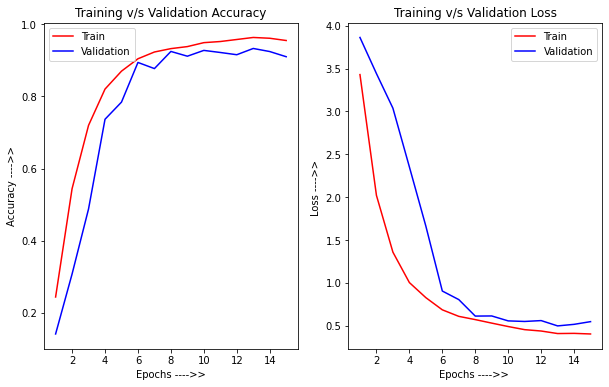

In [19]:
model_log=model.history
acc=model_log.history['accuracy']
val_acc=model_log.history['val_accuracy']
loss=model_log.history['loss']
val_loss=model_log.history['val_loss']
epochs=range(1,len(acc)+1)

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(epochs,acc,label='Training Accuracy ',color='r')
plt.plot(epochs,val_acc,label='Validation Accuracy',color='b')
plt.xlabel('Epochs ---->>')
plt.ylabel('Accuracy ---->>')
plt.legend(['Train','Validation'])
plt.title("Training v/s Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs,loss,label='Training Loss ',color='r')
plt.plot(epochs,val_loss,label='Validation Loss',color='b')
plt.xlabel('Epochs ---->> ')
plt.ylabel('Loss ---->> ')
plt.legend(['Train','Validation'])
plt.title("Training v/s Validation Loss")
plt.show()


plt.show()

### Model Saving

In [22]:
model.save('my_model.h5')

In [23]:
model.save_weights('model_weights.h5')